### EDA

Let's get started with the documentation of the dataset.

* The data has been produced using Monte Carlo simulations. The first 21 features (columns 0-20) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features

https://arxiv.org/abs/1402.4735


That's awesome. 
Unfortunately, the documentation doesn't break down equations of the last seven features. But be ready; these functions might be complex formulae, gearing out levels of non-linearity from the first 21 features. Also, we can highlight the aiming of new features crafting, which can get accomplished by either feature engineering or the algorithm inherent process. This EDA section helps us get through nuances of covariates and the target, warning out of potential issues(redundant features, multicollinearity) and pointing out features treatment.

In [1]:
import dask
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

_ = dask.config.set(scheduler='synchronous') 

In [2]:
import dask.dataframe as dd 

FEATURES = list(range(28)) # 28 features

df = dd.read_csv('../assets/raw_data.csv', 
                 names = ['target'] + FEATURES,
                 dtype={'target': int},
                  blocksize=2e8
                )

#### Target distribution

In [3]:
df['target'].value_counts(normalize=True).compute()

1    0.52992
0    0.47008
Name: target, dtype: float64

The problem is nearly balanced, with 53% of boson higgs and 47% of background noise. 

### Nulls Assessment

In [4]:
%%time
### Check Nulls
count_nulls = df[FEATURES].isnull().sum()
count_nulls.compute()

Wall time: 1min 30s


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
dtype: int64

As long as we don't have None values lying among our covariates, we are ready to evaluate potential outliers on dataset. General histograms and the classical describe functions will help us to check this out.  


In [5]:
%%time
### Feature distributions
describe_features = df[FEATURES].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
describe_features.compute().T

Wall time: 1min 46s


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
0,11000000.0,0.991466,0.565378,0.274697,0.296658,0.366384,0.592766,0.855751,1.240985,2.095637,2.930047,12.098914
1,11000000.0,-0.000008,1.008827,-2.434976,-2.121358,-1.669437,-0.734427,0.004816,0.744058,1.683938,2.132938,2.434868
2,11000000.0,-0.000013,1.006346,-1.742508,-1.706442,-1.565508,-0.864718,0.008739,0.877652,1.571784,1.709389,1.743236
3,11000000.0,0.998536,0.600018,0.000237,0.112088,0.252602,0.578917,0.894858,1.297624,2.114279,2.974925,15.396821
4,11000000.0,0.000026,1.006326,-1.743944,-1.706987,-1.565959,-0.864581,0.011873,0.877465,1.571867,1.709654,1.743257
5,11000000.0,0.990915,0.474975,0.137502,0.334988,0.449333,0.680367,0.897293,1.174221,1.917440,2.783595,9.940391
6,11000000.0,-0.000020,1.009303,-2.969725,-2.432030,-1.628954,-0.681304,0.005916,0.694126,1.639795,2.462676,2.969674
7,11000000.0,0.000008,1.005901,-1.741237,-1.702986,-1.567718,-0.863661,0.007922,0.874965,1.572924,1.705974,1.741454
8,11000000.0,0.999969,1.027808,0.000000,0.000000,0.000000,0.000000,1.086538,2.173076,2.173076,2.173076,2.173076
9,11000000.0,0.992729,0.499994,0.188981,0.305316,0.421147,0.658979,0.892656,1.204771,1.921413,2.818098,11.647081


    
    
The difference between `max` and `99%` points out to some covariates with outlier values, such as covariates `0`, `3`, `5`, `9`, `13`, `17`, `21`, `22`, `23`, `24`, `25`, `26` and `27`. The difference between `min`and `1%` show some "lower" outliers on covariate `23`. The treatment for these edge cases comes as follows, only after a little DataViz!

Simple histograms can ease this glimpse. 

Time to visualize the data. Due to the inexistence of simple ways to do data-visualization with Dask, a quick-and-fast solution is to roll as the classical way. Since my local machine can't afford 11M events, this statistical analysis will leverage only 10% of data.

In [4]:
higgs_sample = df.sample(frac=0.07, random_state=42)
higgs_sample = higgs_sample.compute()
higgs_sample = higgs_sample.reset_index(drop=True)

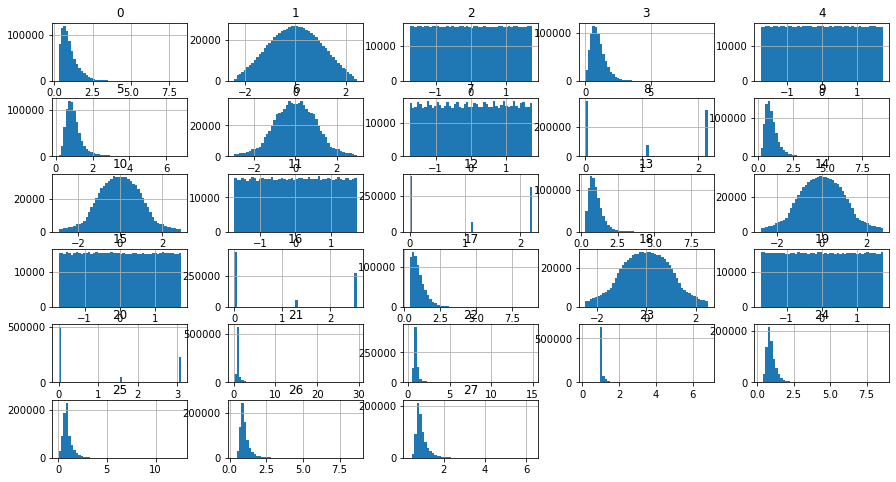

In [5]:
_ = higgs_sample[FEATURES].hist(figsize=(15,8), bins=50)

 Some takeaways from histograms.
 
 * There are 4 categorical variables: 8, 12, 16, 20.
 * Some distribution have outliers on right side: 0, 3, 5, 9, 13, 17, 21, 22, 24, 25, 26, and 27.
 * The covariate 23 has outliers on low and high sides.
 
Next steps:  
    1. to clip the low values of covariate 23.   
    2. to transform categorical variables.    
    3. To power transformation for softening the right outliers. 

In [6]:
# 1 clip the low values
higgs_sample[23] = higgs_sample[23].clip(0.9, 100)

In [7]:
import numpy as np
from sklearn.preprocessing import power_transform, robust_scale

#3 power transform with log functions
for var in [0, 3, 5, 9, 13, 17, 21, 22, 24, 25, 26, 27]:
    higgs_sample[var] = np.log10(higgs_sample[var])
    
higgs_sample[23] = np.log2(higgs_sample[23])

In [8]:
# 2. Controlling the categorical values.
higgs_sample['target'] = higgs_sample['target'].astype(int)

for categorical in [8, 12, 16, 20]:
    higgs_sample[categorical] = higgs_sample[categorical].astype(str)

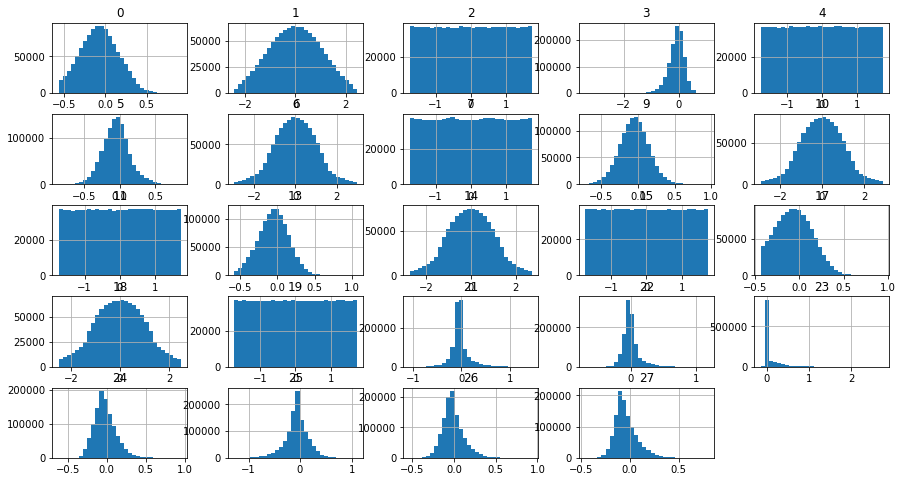

In [12]:
_ = higgs_sample[FEATURES].hist(figsize=(15,8), bins=30)

It looks better!

In [9]:
continuous_features = higgs_sample.select_dtypes(include=[np.float]).columns

C:\Users\JEANCA~1\AppData\Local\Temp/ipykernel_4180/3823621541.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  continuous_features = higgs_sample.select_dtypes(include=[np.float]).columns


#### A plot to compare distributions between the two levels of the response variable.

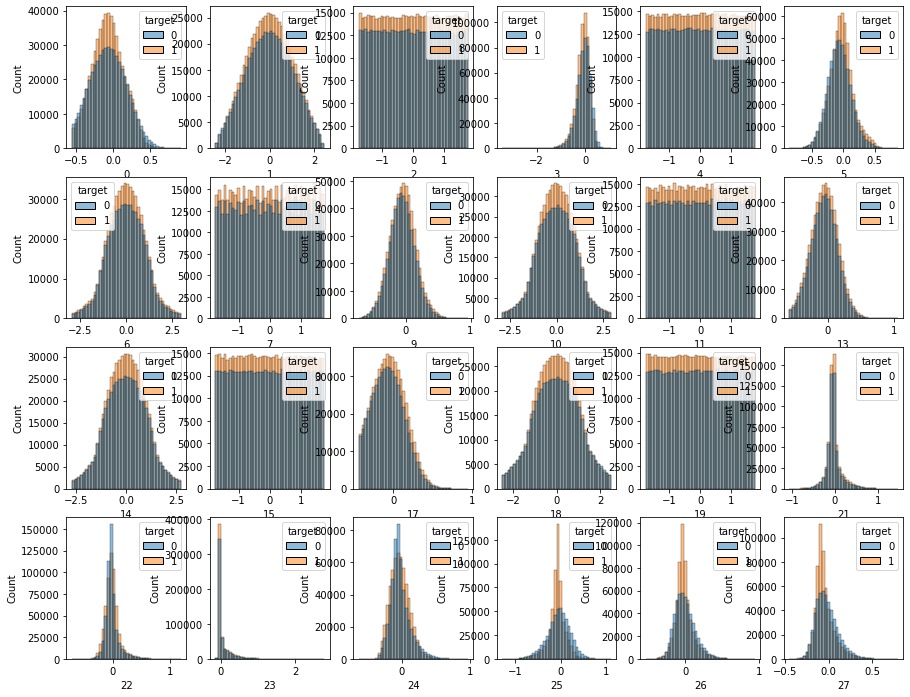

In [14]:
fig, axs = plt.subplots(4, 6, figsize=(15, 12))

for count_1 in range(4):
    for count_2 in range(6):
        sns.histplot(data=higgs_sample, 
                     x=continuous_features[count_1*6+count_2], 
                     hue='target', 
                     color="skyblue", 
                     ax=axs[count_1, count_2],
                     bins=40)

There are slight differences in distributions on target comparison, and those dissimilarities might give a good path for ML algorithms to discriminate. Nevertheless, no distribution alone draws a clear decision frontier.

A simple way to behold the predictability of a categorical variable is by checking the share of target per variable level. The feature `8` has 3 levels: 0, 1.0865, 2.17307 with shares: 0.5356/0.4643, 0.516080/0.483920, and 0.525355/0.474645. Each level is close to the overall:    0.52992/0.47008. Check out the log below. 

In [22]:
print(higgs_sample.groupby(8).target.value_counts(normalize=True))
print(higgs_sample.groupby(12).target.value_counts(normalize=True))
print(higgs_sample.groupby(16).target.value_counts(normalize=True))
print(higgs_sample.groupby(20).target.value_counts(normalize=True))

8                   target
0.0                 1         0.535603
                    0         0.464397
1.0865380764007568  1         0.516080
                    0         0.483920
2.1730761528015137  1         0.525355
                    0         0.474645
Name: target, dtype: float64
12                  target
0.0                 1         0.555354
                    0         0.444646
1.1074360609054563  1         0.514324
                    0         0.485676
2.2148721218109126  1         0.500859
                    0         0.499141
Name: target, dtype: float64
16                  target
0.0                 1         0.539932
                    0         0.460068
1.2741122245788574  1         0.526318
                    0         0.473682
2.548224449157715   1         0.513230
                    0         0.486770
Name: target, dtype: float64
20                  target
0.0                 1         0.522915
                    0         0.477085
1.5509806871414185  1    

----------
#### Correlation Plot(spearman)   

The correlation function is a cool metric for comparing two continuous data, grounded on its ability to describe their inner relationship. Where 1 indicates a strong positive relationship, 0 points out no relationship, and -1 means a negative relationship. Strongly correlated covariates can be filtered, mainly to avoid the multicollinearity problem with linear models. 

https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/  
https://www.sciencedirect.com/topics/mathematics/multicollinearity-problem   

<AxesSubplot:>

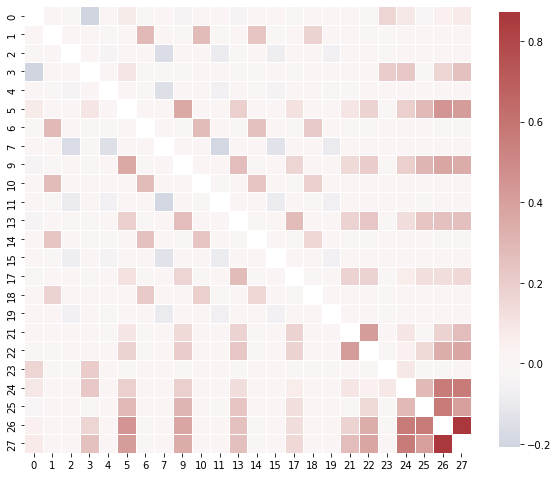

In [15]:
df_corr = higgs_sample[FEATURES].corr(method="spearman")

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

The covariate tuple (27, 26) has shown some relevant correlation. Shall we weed out one of them? A joint-probability distribution might help unpack this relationship better.

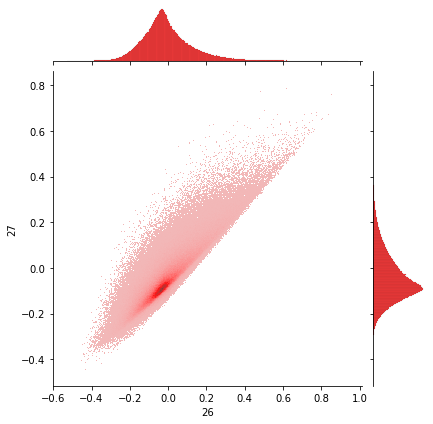

In [16]:
sns.jointplot(data=higgs_sample, x=26, y=27, kind="hist", color='red')

The joint-probability graph suggests the existence of a lower boundary for `27` based on `26`, such as an equation like this `27 = 26 * alpha + complement(noise)`. It is plain to see that values of `27` are "linearly conditioned" by `26`. The pure weight of `27`, the one without of `26`, should control the correlation and might be more meaningful for the prediction task. As it follows, the creation of a new feature, `28`, as a pure value of `27`.

In [10]:
higgs_sample[28] = higgs_sample[27] - higgs_sample[26] 

<AxesSubplot:xlabel='28', ylabel='Count'>

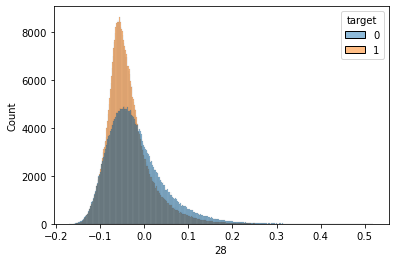

In [18]:
sns.histplot(data=higgs_sample, x=28, hue='target')

Adding this new feature..

In [11]:
FEATURES.append(28)
FEATURES.remove(27)

In [12]:
# checkin the correlation
higgs_sample[[26, 28]].corr('spearman')

,26,28
26,1.000000,-0.458015
28,-0.458015,1.000000


Amazing!

---------
#### Analyzing each predictive power.

This section digs into the predictive power of each covariate related to the target for a better data glimpse. However, a poor individual predictive power doesn't point out the irrelevance, even to linear models. Two practical tests are chi2 categorical-categorical, and FANOVA for continuous-categorical. Scikit-learn has two outstanding APIs for these tasks.

It evaluates p-values on a two-sided tests, therefore at 0.025 alpha.   
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html   
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html  


`F ANOVA` test 
 
https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/ 

With Anova F-test, we test whether the average among populations is significantly different.

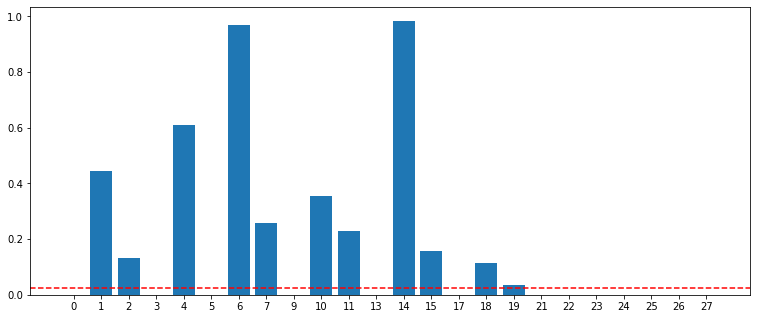

In [21]:
from sklearn.feature_selection import f_classif

f_statistics, p_values = f_classif(X=higgs_sample[continuous_features], y=higgs_sample['target'])

x_labels = [str(x) for x in continuous_features]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(x_labels, p_values)
plt.axhline(y=0.025, color='r', linestyle='--')
plt.show()

Among the covariates, the ones below the red line have significant shifts between the distributions of 0 and 1.

`Chi 2` test 
 
https://www.statisticshowto.com/probability-and-statistics/chi-square/

With Chi 2, we are testing whether the proportions between groups are signifficant

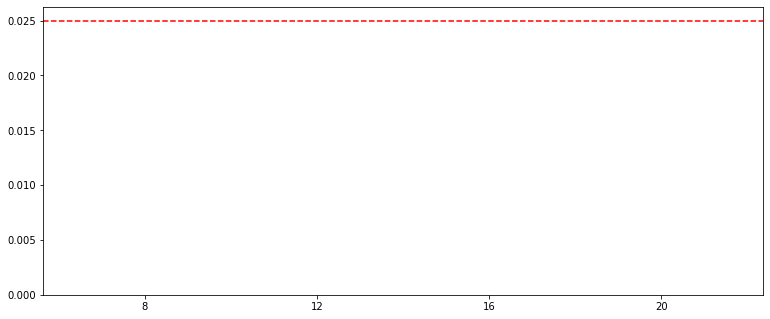

In [34]:
from sklearn.feature_selection import chi2

cat = [8, 12, 16, 20]
chi2_statistics, p_values = chi2(X=higgs_sample[cat], y=higgs_sample['target'])

x_labels = [str(x) for x in cat]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(x_labels, p_values)
plt.axhline(y=0.025, color='r', linestyle='--')
plt.show()

The levels of our four categorical variables are significant in shifting distributions.

----------
#### PCA   

 PCA was developed by Pearson at the beginning of the XX century. It is the most popular technique to reduce dimensionality, yet a sheer analysis of loadings can drive great insights regarding the data structure.

The PCA loadings are the linear operation weights that craft PCA Components. These loadings help understand the linear patterns within the data.

http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

C:\Users\JEANCA~1\AppData\Local\Temp/ipykernel_16492/2487983064.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  continuous_features = higgs_sample[FEATURES].select_dtypes(include=[np.float]).columns


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

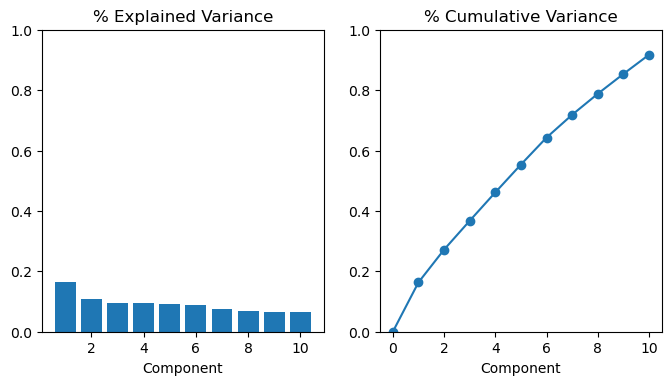

In [22]:
continuous_features = higgs_sample[FEATURES].select_dtypes(include=[np.float]).columns

import pandas as pd

from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca = pca.fit_transform(higgs_sample[continuous_features])

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

factor_loading__higgs_components = pd.DataFrame(
        pca.components_.T,  
        columns=component_names,  
        index=higgs_sample[continuous_features].columns, 
)

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


plot_variance(pca)

<AxesSubplot:>

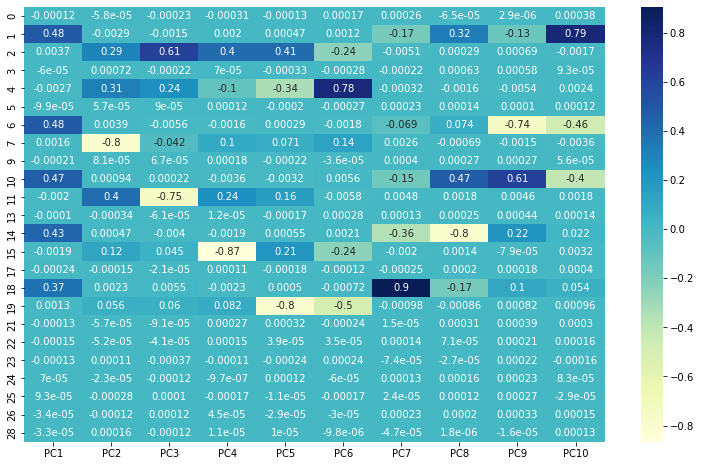

In [23]:
plt.figure(figsize=(13, 8))
sns.heatmap(factor_loading__higgs_components, annot=True, cmap="YlGnBu")

Ten components represent over 95% of the data variance, revealing surprising patterns within the data. Caveat: Since PCA uses linear decomposition, any conclusion is based on linear correspondencies. As it follows a simple report about PCA loadings of the first three components.

 * PC1, which holds nearly 18% of the dataset variance, leverages covariates 18, 14, 10, 6, and 1 on a linear operation with all weights close to -0.4. May this hidden linear pattern shared by those covariates help the prediction?
 * PC2, that holds nearly 12% of the dataset variance, leverages broadly the covariates 11, 7, 4, and 2 on a linear operation with all weights set as -0.43, 0.79, -0.3, -0.29.
 * PC3, that holds nearly 10% of the dataset variance, leverages broadly the covariates 15, 11, 7, 4, and 2 on a linear operation with all weights set as 0.24, -0.74, -0.094, 0.18, 0.6.

Moreover, no component operates on the synthetic covariates, ranging from 21 to 27. It suggests that complex non-linear operations calculated those covariates among the first 21 covariates, which the question testament already has presented. Outstanding.


----------
#### Logistic Regression 

The amazing statistical framework GLM, proposed in 1972 by Nelder and Wedderburn, is absolute when it comes to parametric statistical analysis of linear independent data. The classification response can be treated as Bernoulli/binomial 1-trial, abiding by the requisites of the exponential dispersion family. 

The most popular link choice is the Logit, with its inverse, the sigmoid. Notwithstanding any other decisions such as loglog, cloglog, and cauchy, which we may try later, the logit link has a powerful interpretation ability regarding the betas, as the changes of log odds by unit changes.

Furthermore, benchmarking the null and saturated model can give a glimpse of the power of the covariates on a linear adjustment. It is plain to analyze the fulfillment of all linear model constraints by the residual analysis.

`Let's dig into some important GLM concepts`    

1. Linearity. The algorithm applies a linear operation among beta coefficients and covariates. Therefore, the algorithm is linear.  
2. Link function. GLM leverages a link function that transforms that linear operation into mu(greek word), supported by the distribution specified. The link logit sets the prediction as categorical/bounded predictions. Moreover, the link also sets the variance function. Vide Applying GLMs - James Lindsey.   
3. The independence of Y components.  


The null model has only the intercept parameter, returning the average. The saturated model returns precisely the same values as the data. They represent the dichotomy between the under-fitted and overfitted models. Our model will be something within those two baselines. The amazing metric R^2 evaluates our model on a scale of 0-1, null-saturated. Disclaimer: This R^2 doesn't represent the total variance retained by the model as the linear regression metric. Heads Up to not mess with them.

Coding section!

In [13]:
endogenous = higgs_sample['target']
exogenous = higgs_sample[FEATURES]

exogenous = pd.get_dummies(exogenous, drop_first=True, dtype='int')

In [14]:
from numpy.linalg import matrix_rank

assert exogenous.shape[1] == matrix_rank(exogenous)

The rank matrix is equal to number of columns. There's no clear linear redundancy among the covariates.

In [15]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

exogenous = add_constant(exogenous)
logistic_regression_logit = sm.GLM(endogenous, exogenous, family=sm.families.Binomial())
model_results = logistic_regression_logit.fit()

C:\Users\JeanCarlosMaia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:               770002
Model:                            GLM   Df Residuals:                   769969
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.9941e+05
Date:                Mon, 01 Aug 2022   Deviance:                   9.9882e+05
Time:                        19:00:17   Pearson chi2:                 7.79e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3747      0.012     31.595      0.000       0.351       0.398
0                        -0.2143      0.012    -18.141      0.000      -0.237      -0.191
1                        -0.0015      0.003     -0.567      0.571      -0.007       0.004
2                         0.0008      0.002      0.339      0.735      -0.004       0.006
3                        -0.3211      0.010    -33.506      0.000      -0.340      -0.302
4                         0.0009      0.002      0.363      0.717      -0.004       0.006
5                         1.4162      0.016     90.071      0.000       1.385       1.447
6                        -0.0022      0.003     -0.851      0.395      -0.007       0.003
7                         0.0032      0.003      1.247      0.212      -0.002       0.008
9                         0.2192      0.015     14.864      0.000       0.190       0.248
10                        0.0052      0.003      2.057      0.040       0.000       0.010
11                       -0.0014      0.003     -0.551      0.582      -0.006       0.004
13                        0.0984      0.014      7.052      0.000       0.071       0.126
14                        0.0008      0.003      0.299      0.765      -0.004       0.006
15                       -0.0013      0.002     -0.536      0.592      -0.006       0.003
17                        0.3342      0.013     25.002      0.000       0.308       0.360
18                       -0.0033      0.002     -1.358      0.175      -0.008       0.001
19                       -0.0072      0.002     -2.982      0.003      -0.012      -0.002
21                        0.1403      0.018      7.806      0.000       0.105       0.176
22                        1.7071      0.031     55.769      0.000       1.647       1.767
23                        0.3344      0.015     22.907      0.000       0.306       0.363
24                        1.4703      0.023     63.994      0.000       1.425       1.515
25                       -1.3239      0.016    -83.536      0.000      -1.355      -1.293
26                       -4.1605      0.038   -109.705      0.000      -4.235      -4.086
28                      -10.6007      0.057   -184.839      0.000     -10.713     -10.488
8_1.0865380764007568     -0.3659      0.011    -34.653      0.000      -0.387      -0.345
8_2.1730761528015137     -0.3410      0.008    -40.916      0.000      -0.357      -0.325
12_1.1074360609054563    -0.3721      0.010    -36.027      0.000      -0.392      -0.352
12_2.2148721218109126    -0.4032      0.008    -51.965      0.000      -0.418      -0.388
16_1.2741122245788574    -0.2853      0.011    -26.720      0.000      -0.306      -0.264
16_2.548224449157715     -0.3229      0.007    -43.280      0.000      -0.337      -0.308
20_1.5509806871414185  

Covariates statistically significant to the model are: 0, 3, 5, 9, 13, 17, 21, 22, 23, 24, 25, 26, 28, and the categorical variables 8, 12, 16, and 20.

In [18]:
print('aic: ',  round(model_results.aic, 2), '; bic: ',  round(model_results.bic, 2))
print('loglikelihood: ',  round(model_results.llf, 2), '; deviance: ',  round(model_results.deviance, 2))
print('loglikelihood_null_model: ',  round(model_results.llnull, 2), '; null deviance: ',  round(model_results.null_deviance, 2))

aic:  998886.93 ; bic:  -9437453.15
loglikelihood:  -499410.47 ; deviance:  998820.93
loglikelihood_null_model:  -532408.21 ; null deviance:  1064816.43


In [19]:
#https://bookdown.org/egarpor/PM-UC3M/glm-deviance.html
def r2glm(deviance, null_deviance):
    return 1 - deviance/null_deviance

print('R^2 of glm: ', r2glm(model_results.deviance, model_results.null_deviance))

R^2 of glm:  0.06197828716710041


The covariates enhanced the model. On a scale of 0-1, where 1 is the saturated/eutopia model, the model is on 0.06, being 6% better then the null on this scale.

Mu comparison between null and fitted model.

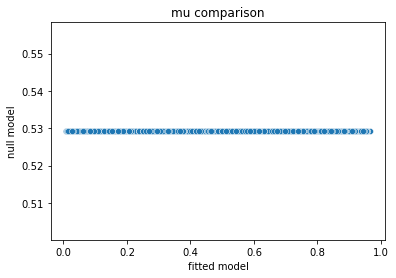

In [20]:
sns.scatterplot(x=model_results.mu, y=model_results.null)
plt.title("mu comparison")
_ = plt.xlabel("fitted model")
_ = plt.ylabel("null model")

The graph reveals the differences between mu of current and null model 

<AxesSubplot:title={'center':'mu histogram'}, ylabel='Count'>

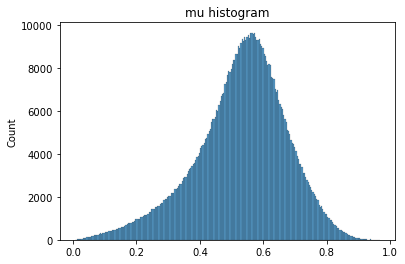

In [21]:
plt.title("mu histogram")
sns.histplot(model_results.mu)

The expected values of the current model are concentrated on 0.55. A good model should discriminate well between classes.

<AxesSubplot:title={'center':'residual analysis'}>

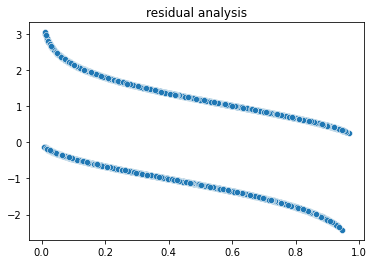

In [22]:
plt.title("residual analysis")
sns.scatterplot(x=model_results.mu, y=model_results.resid_deviance)

Since the output isn't a continuous variable, the residual analysis gets biased. As Moral, Rafael discussed on (Half-Normal Plots and Overdispersed Models in R: The hnp Package) www.jstatsoft.org/article/view/v081i10, the best way to assess model's assumptions is by simulated envelope, in which Python doesn't have a standard open-source implementation(That's a great ideia for a Master's thesis, isn't it?). Nevertheless, the fitting isn't adequate by the deviance residual graphs, since the graph shows a slightly downward trend. The problem isn't linear separable.
https://bookdown.org/egarpor/PM-UC3M/glm-diagnostics.html

Time to "Polyminize" it.

#### Polynomial regression
 
Before getting into advanced techniques for feature building, a simple polynomial regression might indicate if exogenous data gets more informational even in linear constraints. Let's do this.
 
 A two degree polynomial generates 465 covariates and IRLS isn't so resilient to fit so many dimensions. On account of it, we will be fitting the optimization algorithm `limited-memory BFGS`, out of scipy library: `https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html`


In [23]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2, interaction_only=True)

#exogenous = add_constant(exogenous)
exogenous_polynimal = polynomial_features.fit_transform(exogenous)
#exogenous.shape

logistic_regression_logit = sm.GLM(endogenous, exogenous_polynimal, family=sm.families.Binomial())
model_results_poly = logistic_regression_logit.fit(method='lbfgs')

C:\Users\JeanCarlosMaia\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\JeanCarlosMaia\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1129: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [25]:
print('aic: ',  round(model_results_poly.aic, 2), '; bic: ',  round(model_results_poly.bic, 2))
print('loglikelihood: ',  round(model_results_poly.llf, 2), '; deviance: ',  round(model_results_poly.deviance, 2))

aic:  936098.58 ; bic:  -9494556.87
loglikelihood:  -467524.29 ; deviance:  935048.58


Since the aic of poly is lower than the first model, we better pick the poly.

In [26]:
print('R^2 of glm: ', r2glm(model_results_poly.deviance, model_results_poly.null_deviance))

R^2 of glm:  0.1218687561131736


By the R^2, poly regression is clearly better.

<AxesSubplot:title={'center':'residual analysis'}>

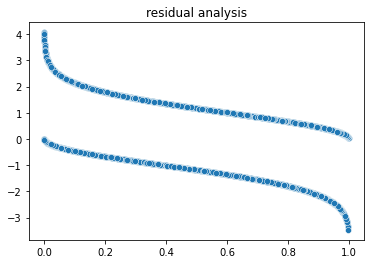

In [27]:
plt.title("residual analysis")
sns.scatterplot(x=model_results_poly.mu, y=model_results_poly.resid_deviance)

There's still a slight downward trend in the residuals

### Takeaways

- Dataset is balanced, with 53% of 1.   
- No Nulls.    
- Some outliers treated with log2 and log10 transformations.   
- Covariates 26 and 27 with a linear relationship. The new covariate 28 is the "pure value" of 27, without 26 effect.   
- GLM Logistic regression produced a lousy fitting, yet superior to the null model. Some evidence points to the non-linearity of data or breach of tuple mean, variance of LogisticRegression.     
- The polynomial model is better yet not fulfilled on the linearity.

In the next notebook, we add more metrics and devote them to nonlinear patterns.   

...Preparing a 2M piece of data for the next step.  

As it follows, a thorough yet concise script for data crafting which had developed throughout this notebook, followed by the data output for the next step. 

In [4]:
import numpy as np

raw_features = list(range(28)) # 28 features

## pulling data
higgs_sample = df.sample(frac=0.3, random_state=42)
higgs_sample = higgs_sample.compute()
higgs_sample = higgs_sample.reset_index(drop=True)

#------------------
# Clip the low values
higgs_sample[23] = higgs_sample[23].clip(0.9, 100)

#----------------------
# Power transform with log functions
for var in [0, 3, 5, 9, 13, 17, 21, 22, 24, 25, 26, 27]:
    higgs_sample[var] = np.log10(higgs_sample[var])
    
higgs_sample[23] = np.log2(higgs_sample[23])

#-----------------------
# Controlling the categorical values.
higgs_sample['target'] = higgs_sample['target'].astype(int)

for categorical in [8, 12, 16, 20]:
    higgs_sample[categorical] = higgs_sample[categorical].astype(str)
    
#-----------------
# New feature
higgs_sample[28] = higgs_sample[27] - higgs_sample[26] 

raw_features.append(28)
raw_features.remove(27)

# Output data
higgs_sample[['target'] + raw_features].to_csv('data-cleaned.csv', index=False) 